# Assignment 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) (Image Credit: Boston.gov). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The task is to make predictions about housing prices using data from the lostion of Ames, Iowa. This makes it squarely a reression ML problem. This model will aid in making accurate predictions for the value of properties in Ames, Iowa. There are useful applications of this tool for home buyers and sellers as well as real estate agents that live in Ames, Iowa. The data set provided by Kaggle contatins 1000+ entires with 80 features. This data is a mix of numerical and categorical data. I am considering using a Linear Regessor, Random Forest and Deceision Tree Models. The most effort is to be spent in the cleaning of data and the most comutational recourses will be consumed in the training of models. The model evaulation metric will the RMSE (lower is better)

The assumptions are that:
1. All data comes from Ames, Iowa and was collected within the same reasonable time interval
2. Predictions made using this model will also be made within the same reasonable time interval such that changes exogenous factors such as Macroeconomic conditions, changes in consumer preferences and impacts to diserablitiy of this community due to factors such as climate change can be assumed ceteris paribus.

In [74]:
# Set some global constants
RANDOM_SEED = 17

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [75]:
import pandas as pd

# To help you get started, a load function is provided below. 
# You will need to fill in the code under #TODO to make it work.
def loadAmesHousingData():
  # The column names are adopted from the dataset page on Kaggle   
  housing = pd.read_csv('/content/train.csv')
  return housing

data_set = loadAmesHousingData()

In [76]:
import os
# Size of Dataset
size = os.path.getsize('/content/train.csv')
print('File size in MB : ', size / (10**6))

File size in MB :  0.460676


In [77]:
#num entries and num features
data_set = loadAmesHousingData()
num_entries, num_features = data_set.shape
print("Number of Entires: ", num_entries)
print("Number of Features: ", num_features)

Number of Entires:  1460
Number of Features:  81


In [78]:
# Provide a quick summary of the data including name of features, count, and type
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Yes there exists a mix of numerical and categorical data in the data set

In [7]:
for key in data_set:
  if type(data_set[key][0]) == str:
    print(key, "(Categorical data)")
    print(data_set[key].value_counts())
    print()

MSZoning (Categorical data)
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street (Categorical data)
Pave    1454
Grvl       6
Name: Street, dtype: int64

LotShape (Categorical data)
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour (Categorical data)
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities (Categorical data)
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig (Categorical data)
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope (Categorical data)
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood (Categorical data)
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41


Yes there is lots of categorical data! Some of these features need to be dropped becuase they are vast magority 1 value. Others could be converted into a binary of either most common or not most common. I will artifically place this cuttoff 70% of catigorical data in 1 catgorgy 

In [8]:
sample_incomplete_rows = data_set[data_set.isnull().any(axis=1)]
len(sample_incomplete_rows)
sample_incomplete_rows.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Yes there is some incomplete, actually all rows have some incomplete data. Thats not good

Here are some basic statistics about the dataset


In [9]:
data_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets examine the corrilational coeffients

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [10]:
discover_set = data_set.copy()

In [11]:
# Your code to visualize the data here
corr_matrix = discover_set.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f181dc658d0>,
      dtype=object)

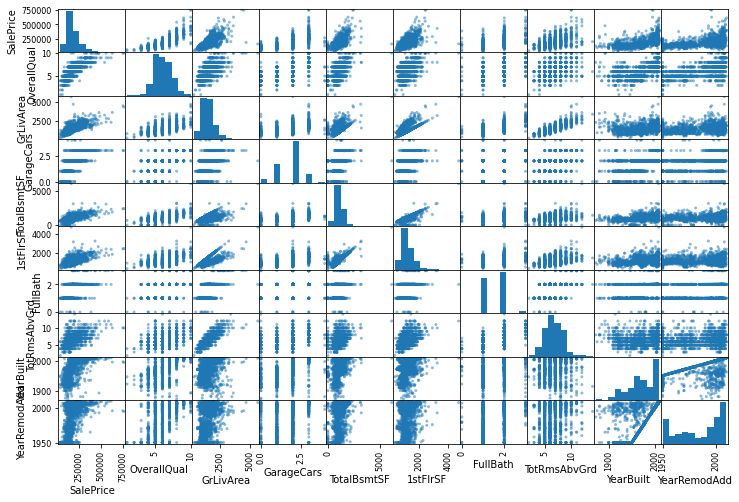

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea",
              "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
              "YearBuilt", "YearRemodAdd"]
scatter_matrix(data_set[attributes], figsize=(12, 8))

In the figure above to judge the corrilations visually it is helpful to examine the SalePrice row or the SalePrice Column to indenify trends

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class. 

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [95]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(data_set, test_size=0.2, random_state=RANDOM_SEED)

housing_nums = train_set.select_dtypes(exclude=['object']).drop('SalePrice', axis=1)
housing_cat = train_set.select_dtypes(include=['object'])
housing_training_labels = train_set["SalePrice"].tolist()

In [79]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [80]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
imputer = SimpleImputer(strategy="median")

In [81]:
train_nums_only = train_set.select_dtypes(include=[np.number])

In [83]:
imputer.fit(train_nums_only)
X = imputer.transform(train_nums_only)

In [84]:
data_tr = pd.DataFrame(X, columns=train_nums_only.columns, index=train_set.index)
data_tr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
254,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,145000.0
1066,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0,178000.0
638,639.0,30.0,67.0,8777.0,5.0,7.0,1910.0,1950.0,0.0,0.0,...,328.0,0.0,164.0,0.0,0.0,0.0,0.0,5.0,2008.0,85000.0
799,800.0,50.0,60.0,7200.0,5.0,7.0,1937.0,1950.0,252.0,569.0,...,0.0,0.0,264.0,0.0,0.0,0.0,0.0,6.0,2007.0,175000.0
380,381.0,50.0,50.0,5000.0,5.0,6.0,1924.0,1950.0,0.0,218.0,...,0.0,0.0,242.0,0.0,0.0,0.0,0.0,5.0,2010.0,127000.0


In [85]:
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)]
len(sample_incomplete_rows)

1168

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropEmptyData(BaseEstimator, TransformerMixin):
  def __init__(self, drop_bad_data = True):
    self.drop_bad_data = drop_bad_data
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    if self.drop_bad_data:
      nullCount = X.isnull().sum(axis = 0)
      nullCountList = list(zip(nullCount.index, nullCount))
      for each in nullCountList:
        if each[1] > (num_entries / 2): # if over 50% of data is missing drop the feature
          X.drop([each[0]], axis = 1, inplace=True)
    return X

In [87]:
def dropCatData(df):
  nullCount = df.isnull().sum(axis = 0)
  nullCountList = list(zip(nullCount.index,nullCount))

  for each in nullCountList:  # if over 50% of data is missing drop the feature
    if each[1] > (num_entries / 2):
      df.drop(each[0], axis=1, inplace=True)

  for col in df:
    proportions = df[col].value_counts() / len(df)
    proportions_df = proportions.to_frame()
  for index, row in proportions_df.iterrows():
    rowList = list(zip(row.index,row))
    if rowList[0][1] > 0.9:  # if over 90% of data within a category is idenitcal drop the feature
      df.drop(col, axis=1, inplace=True)
  return df

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('DropNumData', DropEmptyData()),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_nums)

In [89]:
housing_num_tr

array([[-1.11928402, -0.8667643 , -0.01246836, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.79046412,  0.07410996, -0.50235683, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.21615189, -0.63154574, -0.14607431, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [ 1.32669882, -0.8667643 , -0.45782152, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [ 0.30597137, -0.16110861, -0.6804981 , ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 0.93157852,  1.48542135, -0.76956873, ..., -0.09274033,
        -0.13341669,  0.89367742]])

Now to Fix remaining categorical data

In [164]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder(handle_unknown='ignore')),
    ('std_scaler', StandardScaler(with_mean=False)),
])

housing_cat_tr = cat_pipeline.fit_transform(dropCatData(housing_cat))
      

In [91]:
housing_cat_tr.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.63383911,
        0.        ]])

The final composite pipeline implimentation

In [165]:
 # Your code check for missing values, feature scaling, and put all transformation into a pipeline here
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_nums)
print(num_attribs)
cat_attribs = list(dropCatData(housing_cat))

final_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

housing_training_prepared = final_pipeline.fit_transform(train_set)

print(train_set.shape)
print(housing_training_prepared.shape)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
(1168, 81)
(1168, 273)


For Debuging step error:


## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [99]:
# Try a few models here

from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(housing_training_prepared, housing_training_labels)

some_data = data_set.iloc[:5]
some_labels = housing_training_labels[:5]
some_data_prepared = final_pipeline.transform(some_data)

print("Predictions:", line_reg.predict(some_data_prepared))

Predictions: [205201.6895137  202118.38828294 204509.30837346 160286.2820672
 290419.49489944]


In [100]:
print("Labels:", list(some_labels))

Labels: [173500, 194500, 189000, 189000, 230000]


In [101]:
from sklearn.metrics import mean_squared_error

housing_predictions = line_reg.predict(housing_training_prepared)
line_mse = mean_squared_error(housing_training_labels, housing_predictions)
line_rmse = np.sqrt(line_mse)
line_rmse

20534.45180880198

In [102]:
from sklearn.metrics import mean_absolute_error

line_mae = mean_absolute_error(housing_training_labels, housing_predictions)
line_mae

13203.303666073498

Decision Tree with comparisons to linear models

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=RANDOM_SEED)
tree_reg.fit(housing_training_prepared, housing_training_labels)

DecisionTreeRegressor(random_state=17)

In [104]:
housing_predictions = tree_reg.predict(housing_training_prepared)
tree_mse = mean_squared_error(housing_training_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_training_prepared, housing_training_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [106]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [45617.7825476  44814.43931192 44508.52660643 41318.69659572
 47401.71117862]
Mean: 44732.23124805654
Standard deviation: 1980.8758143273785


In [107]:
line_scores = cross_val_score(line_reg, housing_training_prepared, housing_training_labels,
                             scoring="neg_mean_squared_error", cv=5)
line_rmse_scores = np.sqrt(-line_scores)
display_scores(line_rmse_scores)

Scores: [40688.84185558 26433.06368874 27040.37174678 37250.08037373
 48818.31943746]
Mean: 36046.13542045733
Standard deviation: 8481.129860138131


Random Forest with comparsion to Linear

In [108]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=35, random_state=RANDOM_SEED)
forest_reg.fit(housing_training_prepared, housing_training_labels)

RandomForestRegressor(n_estimators=35, random_state=17)

In [109]:
housing_predictions = forest_reg.predict(housing_training_prepared)
forest_mse = mean_squared_error(housing_training_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11763.117357182886

In [110]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_training_prepared, housing_training_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [37439.4343622  25224.69192494 32216.92760212 28212.2472243
 35829.53689005]
Mean: 31784.56760072121
Standard deviation: 4567.705585214908


In [111]:
# cv for linear regression
scores = cross_val_score(line_reg, housing_training_prepared, housing_training_labels, scoring="neg_mean_squared_error", cv=5)
pd.Series(np.sqrt(-scores)).describe()

count        5.000000
mean     36046.135420
std       9482.191447
min      26433.063689
25%      27040.371747
50%      37250.080374
75%      40688.841856
max      48818.319437
dtype: float64

Random Forst is identified as the optimal algorithm to tune

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=250),
        'max_features': randint(low=1, high=housing_training_prepared.shape[1]),
    }

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=RANDOM_SEED)
rnd_search.fit(housing_training_prepared, housing_training_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1818c43d10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1818c430d0>},
                   random_state=17, scoring='neg_mean_squared_error')

In [115]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

30089.907755776258 {'max_features': 112, 'n_estimators': 242}
30507.711119037827 {'max_features': 144, 'n_estimators': 135}
30865.85078895044 {'max_features': 241, 'n_estimators': 174}
30520.950759730462 {'max_features': 32, 'n_estimators': 69}
30353.15859141703 {'max_features': 40, 'n_estimators': 213}
33654.20228954782 {'max_features': 8, 'n_estimators': 130}
33040.989315162005 {'max_features': 239, 'n_estimators': 18}
30281.71314498542 {'max_features': 42, 'n_estimators': 185}
30857.844169036565 {'max_features': 267, 'n_estimators': 227}
30194.262116666003 {'max_features': 132, 'n_estimators': 64}


Appears to be a clustering around 100-150 max features and 120-220 max features

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [100, 110, 120, 130, 140, 150], 'max_features': [120, 140, 160, 180, 200, 220]},
    {'bootstrap': [False], 'n_estimators': [110, 140], 'max_features': [140, 180, 4200]},
  ]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_training_prepared, housing_training_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_features': [120, 140, 160, 180, 200, 220],
                          'n_estimators': [100, 110, 120, 130, 140, 150]},
                         {'bootstrap': [False],
                          'max_features': [140, 180, 4200],
                          'n_estimators': [110, 140]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [117]:
grid_search.best_params_

{'max_features': 180, 'n_estimators': 120}

In [118]:
grid_search.best_estimator_

RandomForestRegressor(max_features=180, n_estimators=120, random_state=17)

In [119]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

30415.267457305614 {'max_features': 120, 'n_estimators': 100}
30513.165948185917 {'max_features': 120, 'n_estimators': 110}
30361.400605891602 {'max_features': 120, 'n_estimators': 120}
30393.677310569405 {'max_features': 120, 'n_estimators': 130}
30372.308039806532 {'max_features': 120, 'n_estimators': 140}
30311.156348674587 {'max_features': 120, 'n_estimators': 150}
30421.348165965308 {'max_features': 140, 'n_estimators': 100}
30467.40160136713 {'max_features': 140, 'n_estimators': 110}
30398.994584306216 {'max_features': 140, 'n_estimators': 120}
30361.88481086585 {'max_features': 140, 'n_estimators': 130}
30435.775977672387 {'max_features': 140, 'n_estimators': 140}
30490.10359800333 {'max_features': 140, 'n_estimators': 150}
30185.339634192256 {'max_features': 160, 'n_estimators': 100}
30205.56821599621 {'max_features': 160, 'n_estimators': 110}
30116.7149290857 {'max_features': 160, 'n_estimators': 120}
30057.876728951946 {'max_features': 160, 'n_estimators': 130}
30012.12500470

Itterate to Reduce Search Space

In [120]:
param_grid = [
    {'n_estimators': [50, 75, 100, 125, 150], 'max_features': [80, 90, 100, 110, 120, 130]},
    {'bootstrap': [False], 'n_estimators': [75, 125], 'max_features': [90, 100, 110]},
  ]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_training_prepared, housing_training_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_features': [80, 90, 100, 110, 120, 130],
                          'n_estimators': [50, 75, 100, 125, 150]},
                         {'bootstrap': [False], 'max_features': [90, 100, 110],
                          'n_estimators': [75, 125]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=110, n_estimators=75,
                      random_state=17)

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

31168.59291062997 {'max_features': 80, 'n_estimators': 50}
30559.558538792753 {'max_features': 80, 'n_estimators': 75}
30431.207862533698 {'max_features': 80, 'n_estimators': 100}
30388.987163507398 {'max_features': 80, 'n_estimators': 125}
30373.8322031836 {'max_features': 80, 'n_estimators': 150}
31104.679037504622 {'max_features': 90, 'n_estimators': 50}
31094.080700071467 {'max_features': 90, 'n_estimators': 75}
31033.017698740317 {'max_features': 90, 'n_estimators': 100}
30665.151937571143 {'max_features': 90, 'n_estimators': 125}
30541.69587302485 {'max_features': 90, 'n_estimators': 150}
30468.63030612204 {'max_features': 100, 'n_estimators': 50}
30431.998814948063 {'max_features': 100, 'n_estimators': 75}
30483.047412351454 {'max_features': 100, 'n_estimators': 100}
30429.193291896816 {'max_features': 100, 'n_estimators': 125}
30439.509047725074 {'max_features': 100, 'n_estimators': 150}
30713.452847550725 {'max_features': 110, 'n_estimators': 50}
30476.48449045139 {'max_featur

These last 2 runs are telling me my max_features is still way to high
Itterate Again

In [125]:
param_grid = [
    {'n_estimators': [50, 75, 100, 125, 150], 'max_features': [40, 50, 60, 70, 80, 90]},
    {'bootstrap': [False], 'n_estimators': [75, 125], 'max_features': [50, 60, 70]},
  ]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_training_prepared, housing_training_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_features': [40, 50, 60, 70, 80, 90],
                          'n_estimators': [50, 75, 100, 125, 150]},
                         {'bootstrap': [False], 'max_features': [50, 60, 70],
                          'n_estimators': [75, 125]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [126]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=50, n_estimators=125,
                      random_state=17)

In [127]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

30833.51471542082 {'max_features': 40, 'n_estimators': 50}
30505.02041574977 {'max_features': 40, 'n_estimators': 75}
30418.441691681306 {'max_features': 40, 'n_estimators': 100}
30281.163861935882 {'max_features': 40, 'n_estimators': 125}
30183.010651994653 {'max_features': 40, 'n_estimators': 150}
31345.535553803613 {'max_features': 50, 'n_estimators': 50}
30838.16369108653 {'max_features': 50, 'n_estimators': 75}
30447.25483049891 {'max_features': 50, 'n_estimators': 100}
30380.708809140684 {'max_features': 50, 'n_estimators': 125}
30302.99789410786 {'max_features': 50, 'n_estimators': 150}
30567.60886357641 {'max_features': 60, 'n_estimators': 50}
29968.61224006374 {'max_features': 60, 'n_estimators': 75}
30148.260581242896 {'max_features': 60, 'n_estimators': 100}
30298.058419655044 {'max_features': 60, 'n_estimators': 125}
30228.022867509902 {'max_features': 60, 'n_estimators': 150}
30900.440080066513 {'max_features': 70, 'n_estimators': 50}
30551.107170804415 {'max_features': 70

Now itterate on best n_estimators

In [128]:
param_grid = [
    {'n_estimators': [10, 20, 30, 40, 50], 'max_features': [40, 45, 50, 55, 60]},
    {'bootstrap': [False], 'n_estimators': [20, 40], 'max_features': [45, 50, 55]},
  ]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_training_prepared, housing_training_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_features': [40, 45, 50, 55, 60],
                          'n_estimators': [10, 20, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [45, 50, 55],
                          'n_estimators': [20, 40]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [129]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=50, n_estimators=40,
                      random_state=17)

In [130]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

32081.304508943937 {'max_features': 40, 'n_estimators': 10}
31963.778830283598 {'max_features': 40, 'n_estimators': 20}
31057.55367326506 {'max_features': 40, 'n_estimators': 30}
30792.014034119224 {'max_features': 40, 'n_estimators': 40}
30833.51471542082 {'max_features': 40, 'n_estimators': 50}
34155.70925189843 {'max_features': 45, 'n_estimators': 10}
32600.035401783276 {'max_features': 45, 'n_estimators': 20}
31685.273948162114 {'max_features': 45, 'n_estimators': 30}
31006.279553721764 {'max_features': 45, 'n_estimators': 40}
30878.84292060734 {'max_features': 45, 'n_estimators': 50}
33962.50109544289 {'max_features': 50, 'n_estimators': 10}
32630.155660927245 {'max_features': 50, 'n_estimators': 20}
31501.553193800715 {'max_features': 50, 'n_estimators': 30}
31663.781154565462 {'max_features': 50, 'n_estimators': 40}
31345.535553803613 {'max_features': 50, 'n_estimators': 50}
31278.934674796288 {'max_features': 55, 'n_estimators': 10}
31237.40368909398 {'max_features': 55, 'n_est

I consider this level of hyper parameter opmimization optimal

In [131]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.30585521e-03, 3.08599593e-03, 9.71863094e-03, 1.52620730e-02,
       1.56624447e-01, 3.61381966e-03, 5.46110779e-02, 1.92956170e-02,
       8.82009801e-03, 1.68823424e-02, 6.63678610e-04, 6.24748040e-03,
       9.17503186e-02, 5.66152803e-02, 3.09260344e-02, 2.15178588e-04,
       1.12455571e-01, 2.04544874e-03, 1.43011154e-04, 1.49578984e-02,
       3.40638203e-03, 4.62302193e-03, 7.50273397e-04, 8.14968224e-03,
       1.41319236e-02, 1.31736643e-02, 9.55252905e-02, 4.49621731e-02,
       3.53833235e-03, 7.11451059e-03, 1.00757301e-03, 2.95706660e-04,
       9.06757371e-04, 1.50095969e-03, 1.36829051e-04, 2.92113853e-03,
       1.93883785e-03, 3.07095368e-04, 2.28459453e-04, 7.37132018e-05,
       1.43163962e-03, 2.04835526e-03, 7.05093099e-06, 4.96707112e-06,
       6.57567601e-04, 7.74975076e-04, 4.02593876e-04, 1.01169943e-03,
       1.93326021e-03, 6.37330583e-04, 3.64811694e-04, 8.96924762e-04,
       0.00000000e+00, 3.24784044e-04, 3.79833742e-04, 1.08152902e-04,
      

In [132]:
sorted(zip(feature_importances, list(data_set)))

[(0.0, 'KitchenAbvGr'),
 (2.65910550698201e-06, 'MiscFeature'),
 (2.8101210749101322e-06, 'GarageArea'),
 (4.967071115735749e-06, '1stFlrSF'),
 (6.841131161275182e-06, 'GarageQual'),
 (7.050930992191101e-06, 'Electrical'),
 (2.621321301079814e-05, 'Fireplaces'),
 (2.742506422576919e-05, 'GarageCars'),
 (2.822965487104258e-05, 'PoolArea'),
 (6.0342698091481376e-05, 'SaleCondition'),
 (7.371320184171739e-05, 'Heating'),
 (7.454350788816078e-05, 'PoolQC'),
 (9.343759167287017e-05, 'SalePrice'),
 (9.66515418960309e-05, 'ScreenPorch'),
 (0.00010375808564933916, 'GarageCond'),
 (0.00010815290202261683, 'Functional'),
 (0.00013671549486265845, '3SsnPorch'),
 (0.0001368290513400412, 'BsmtFinSF1'),
 (0.0001430111537690176, 'OverallCond'),
 (0.00018919255960350638, 'MiscVal'),
 (0.00021517858823117612, 'BldgType'),
 (0.0002284594532448616, 'TotalBsmtSF'),
 (0.0002693597245552353, 'WoodDeckSF'),
 (0.00027803506538414134, 'Fence'),
 (0.0002957066600781955, 'BsmtCond'),
 (0.00030709536820348177, 'B

Generate Final Evaluation metrics from test set

SO turns out I do not know how to do grid search well...
But can use incites to guide random

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=40, high=150),
        'max_features': randint(low=1, high=housing_training_prepared.shape[1]),
    }

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=RANDOM_SEED)
rnd_search.fit(housing_training_prepared, housing_training_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1818af7a50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1818af7250>},
                   random_state=17, scoring='neg_mean_squared_error')

In [170]:
final_model = rnd_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].tolist()

X_test_prepared = final_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

26688.836398205007

In [171]:
from sklearn.metrics import mean_absolute_error

line_mae = mean_absolute_error(y_test, final_predictions)
line_mae

16869.245315860975

In [172]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([21107.18635207, 31290.16875761])

In [174]:
feature_importances = rnd_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, list(data_set)))

[(0.0, 'KitchenAbvGr'),
 (2.760943162763064e-06, 'GarageArea'),
 (7.2917703321588625e-06, '1stFlrSF'),
 (1.1877513408052764e-05, 'GarageQual'),
 (2.0692143021322722e-05, 'Heating'),
 (2.206201012522941e-05, 'MiscFeature'),
 (2.5127764873853665e-05, 'PoolArea'),
 (3.5367875015061834e-05, 'Electrical'),
 (4.333239208617424e-05, 'GarageCars'),
 (4.384304304328047e-05, 'Fireplaces'),
 (6.634148569752217e-05, 'Functional'),
 (7.258900626676832e-05, 'SaleCondition'),
 (8.988314935138475e-05, 'ScreenPorch'),
 (9.107738850658836e-05, 'SalePrice'),
 (9.199484549347985e-05, 'PoolQC'),
 (9.410806002872448e-05, 'GarageCond'),
 (9.533635623727018e-05, '3SsnPorch'),
 (0.00011283713963792041, 'TotalBsmtSF'),
 (0.0001459297233686614, 'BsmtFinSF1'),
 (0.0001580955939240692, 'MiscVal'),
 (0.00016145286165275677, 'GrLivArea'),
 (0.00017699903479055401, 'BsmtUnfSF'),
 (0.0002122771502659013, 'WoodDeckSF'),
 (0.0002192277662333513, 'BldgType'),
 (0.0002363650855335925, 'BsmtCond'),
 (0.0002575190552577798,

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

*Assuming the context is for a small to mid sized real estate realter firm*

Hello Team,

I am writting to propose a new tool using a Machine Learning model to help us better evaulate market sales price of houses. With my model we can predict the projected Sale Price of a house within $30,000 of accurecy. The model claims that the 2 most imporant aspects of a house value are Lot Area and House Style which is consistent with our beliefs and should inspire higher confiendience in my proposed new tool. Going forward if this tool were adopted I would like to begin collecting a more expansive data set for training this machine learning tool so that it may provide even more utility to our firm.

Thank you for your time,

Robert Owens